In [120]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import requests
import json

In [319]:
#load in csv
olympics_data = pd.read_csv("Summer-Olympic-medals-1976-to-2008.csv", encoding="latin-1")
olympics_data.dropna(inplace=True)
medal_dict = {'Gold':3,'Silver':2,'Bronze':1}
olympics_data['Points'] = olympics_data['Medal'].map(medal_dict)
olympics_data.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal,Points
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver,2
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze,1
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold,3
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver,2
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze,1


# Comparing the Results of Countries Pre- and Post- Extreme Regime Changes

There were 15 countries in the Soviet Union: Armenia, Azerbaijan, Belarus, Estonia, Georgia, Kazakhstan, Kyrgyzstan, Latvia, Lithuania, Moldova, Russia, Tajikistan, Turkmenistan, Ukraine, and Uzbekistan (https://www.infobloom.com/which-countries-were-part-of-the-soviet-union.htm). East and West Germany became one united Germany. This section looks at The performance of the Soviet Union's perforance during the olympics pre-1992 (since it collapsed in 1991) and compares it to the performance of these 15 countries from 1992 on. Similarly, the performances of East and West Germany during the olympics pre-1992 (since they unified in 1990 (https://www.history.com/this-day-in-history/east-and-west-germany-reunite-after-45-years)) willbe compared to the performance of Germany from 1992 on. - Kaylie S.

In [320]:
#seeing which countries appear on the list
olympics_data["Country"].sort_values().unique()

array(['Afghanistan', 'Algeria', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Barbados', 'Belarus',
       'Belgium', 'Bermuda*', 'Brazil', 'Bulgaria', 'Burundi', 'Cameroon',
       'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic',
       'Czechoslovakia', 'Denmark', 'Djibouti', 'Dominican Republic',
       'East Germany', 'Ecuador', 'Egypt', 'Eritrea', 'Estonia',
       'Ethiopia', 'Finland', 'France', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Guyana', 'Hong Kong*', 'Hungary', 'Iceland',
       'Independent Olympic Participants (1992)', 'India', 'Indonesia',
       'Iran', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kenya', 'Korea, North', 'Korea, South', 'Kuwait',
       'Kyrgyzstan', 'Latvia', 'Lebanon', 'Lithuania', 'Macedonia',
       'Malaysia', 'Mauritius', 'Mexico', 'Moldova', 'Mongolia',
       'Morocco', 'Mozambique', 'Namibia', 'Netherlands'

We can see from above that from 1992 to 2008, Turkmenistan did not win a medal at all, and will not be included in the analysis until the end.

In [321]:
#group the olymics data by country
country_olympics_data = olympics_data.groupby("Country")

#pull the data for the Soviet Union and former Soviet countries into separate dataframes
soviet_data = country_olympics_data.get_group("Soviet Union").reset_index()
armenia_data = country_olympics_data.get_group("Armenia").reset_index()
azerbaijan_data = country_olympics_data.get_group("Azerbaijan").reset_index()
belarus_data = country_olympics_data.get_group("Belarus").reset_index()
estonia_data = country_olympics_data.get_group("Estonia").reset_index()
georgia_data = country_olympics_data.get_group("Georgia").reset_index()
kazakhstan_data = country_olympics_data.get_group("Kazakhstan").reset_index()
kyrgyzstan_data = country_olympics_data.get_group("Kyrgyzstan").reset_index()
latvia_data = country_olympics_data.get_group("Latvia").reset_index()
lithuania_data = country_olympics_data.get_group("Lithuania").reset_index()
moldova_data = country_olympics_data.get_group("Moldova").reset_index()
russia_data = country_olympics_data.get_group("Russia").reset_index()
tajikistan_data = country_olympics_data.get_group("Tajikistan").reset_index()
ukraine_data = country_olympics_data.get_group("Ukraine").reset_index()
uzbekistan_data = country_olympics_data.get_group("Uzbekistan").reset_index()

#pull the data for East, West, and united Germany into separate dataframes
east_germany_data = country_olympics_data.get_group("East Germany").reset_index()
west_germany_data = country_olympics_data.get_group("West Germany").reset_index()
germany_data = country_olympics_data.get_group("Germany").reset_index()

In [322]:
#saving pre and post collapse countries to lists
pre_collapse_dfs = [soviet_data, east_germany_data, west_germany_data]
post_collapse_dfs = [armenia_data, azerbaijan_data, belarus_data, estonia_data, georgia_data, kazakhstan_data, kyrgyzstan_data, 
                latvia_data, lithuania_data, moldova_data, russia_data, tajikistan_data, ukraine_data, uzbekistan_data, germany_data]

Here, the total medal counts for the country, regardless of year, are calculated.

In [323]:
#lists for countries and medal counts
countries_pre = []
golds_pre = []
silvers_pre = []
bronzes_pre = []

countries_post = []
golds_post = []
silvers_post = []
bronzes_post = []

#create functions to give a total medal count
def total_medal_count_pre(df):
    #convert medal counts to dictionary
    counts = df["Medal"].value_counts().to_dict()
    countries_pre.append(df["Country"][0])
    #get the value of each key to append to the lists, with "0" appending if no value exists
    golds_pre.append(counts.get(("Gold"), 0))
    silvers_pre.append(counts.get(("Silver"), 0))
    bronzes_pre.append(counts.get(("Bronze"), 0))
    
def total_medal_count_post(df):
    #convert medal counts to dictionary
    counts = df["Medal"].value_counts().to_dict()
    countries_post.append(df["Country"][0])
    #get the value of each key to append to the lists, with "0" appending if no value exists
    golds_post.append(counts.get(("Gold"), 0))
    silvers_post.append(counts.get(("Silver"), 0))
    bronzes_post.append(counts.get(("Bronze"), 0))
    
#running the function on all countries
for country in pre_collapse_dfs:
    total_medal_count_pre(country)
    
for country in post_collapse_dfs:
    total_medal_count_post(country)

Below we are comparing East and West Germany(1976-1988) to Germany (1992-2008).

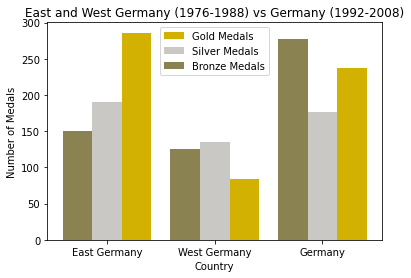

In [355]:
#setting up Germany comparison
german_comparison = {
    "Countries": [countries_pre[1], countries_pre[2], countries_post[-1]],
    "Golds": [golds_pre[1], golds_pre[2], golds_post[-1]],
    "Silvers": [silvers_pre[1], silvers_pre[2], silvers_post[-1]],
    "Bronzes": [bronzes_pre[1], bronzes_pre[2], bronzes_post[-1]],
}

#plotting germany comparison
width = 0.275
x_germ = np.array(range(len(pre_collapse_dfs)))

plt.bar(x_germ + width, german_comparison["Golds"], width=width, color="#d2b103", label="Gold Medals")
plt.bar(x_germ, german_comparison["Silvers"], width=width, color="#c9c8c4", label="Silver Medals")
plt.bar(x_germ - width, german_comparison["Bronzes"], width=width, color="#8b8251", label="Bronze Medals")
plt.xticks(x_germ, german_comparison["Countries"])
plt.title("East and West Germany (1976-1988) vs Germany (1992-2008)")
plt.ylabel("Number of Medals")
plt.xlabel("Country")
plt.legend()

plt.savefig("images/german_separate_comparison.png")
plt.show()

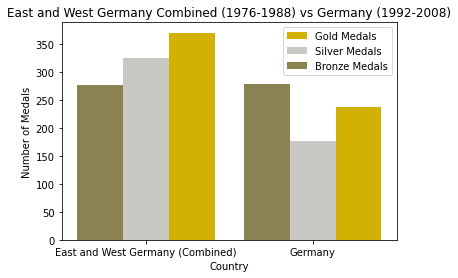

In [356]:
#combining east and west germany stats
ew_germany = "East and West Germany (Combined)"
ew_golds = sum(golds_pre[1:])
ew_silvers= sum(silvers_pre[1:])
ew_bronzes = sum(bronzes_pre[1:])

combined_german_comparison = {
    "Countries": [ew_germany, countries_post[-1]],
    "Golds": [ew_golds, golds_post[-1]],
    "Silvers": [ew_silvers, silvers_post[-1]],
    "Bronzes": [ew_bronzes, bronzes_post[-1]],
}

#plotting germany comparison
width = 0.275
x_germ_com = np.array(range(2))

plt.bar(x_germ_com + width, combined_german_comparison["Golds"], width=width, color="#d2b103", label="Gold Medals")
plt.bar(x_germ_com, combined_german_comparison["Silvers"], width=width, color="#c9c8c4", label="Silver Medals")
plt.bar(x_germ_com - width, combined_german_comparison["Bronzes"], width=width, color="#8b8251", label="Bronze Medals")
plt.xticks(x_germ_com, combined_german_comparison["Countries"])
plt.title("East and West Germany Combined (1976-1988) vs Germany (1992-2008)")
plt.ylabel("Number of Medals")
plt.xlabel("Country")
plt.legend()

plt.savefig("images/german_combined_comparison.png")
plt.show()

Below we are comparing the Soviet Union (1976-1988) to all the former Soviet countries (1992-2008).

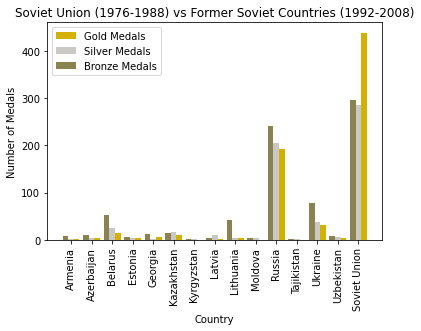

In [357]:
#setting up Soviet comparison
soviet_countries = countries_post[:-1]
soviet_countries.append(countries_pre[0])
soviet_golds = golds_post[:-1]
soviet_golds.append(golds_pre[0])
soviet_silvers = silvers_post[:-1]
soviet_silvers.append(silvers_pre[0])
soviet_bronzes = bronzes_post[:-1]
soviet_bronzes.append(bronzes_pre[0])

#plotting soviet comparison
width = 0.275
x_sov = np.array(range(len(post_collapse_dfs)))

plt.bar(x_sov + width, soviet_golds, width=width, color="#d2b103", label="Gold Medals")
plt.bar(x_sov, soviet_silvers, width=width, color="#c9c8c4", label="Silver Medals")
plt.bar(x_sov - width, soviet_bronzes, width=width, color="#8b8251", label="Bronze Medals")
plt.xticks(x_sov, soviet_countries, rotation=90)
plt.title("Soviet Union (1976-1988) vs Former Soviet Countries (1992-2008)")
plt.ylabel("Number of Medals")
plt.xlabel("Country")
plt.legend()

plt.savefig("images/soviet_separate_comparison.png")
plt.show()

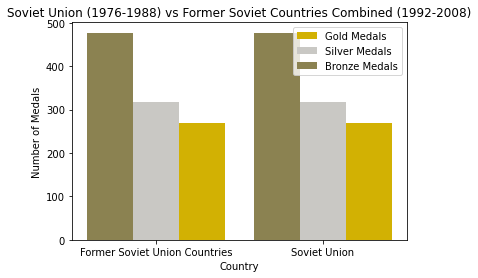

In [358]:
#combining post soviet country data
post_soviet_countries = ["Former Soviet Union Countries", "Soviet Union"]
post_soviet_golds = sum(golds_post[:-1])
post_soviet_silvers = sum(silvers_post[:-1])
post_soviet_bronzes = sum(bronzes_post[:-1])

#plotting soviet comparison
width = 0.275
x_sov_combined = np.array(range(2))

plt.bar(x_sov_combined + width, post_soviet_golds, width=width, color="#d2b103", label="Gold Medals")
plt.bar(x_sov_combined, post_soviet_silvers, width=width, color="#c9c8c4", label="Silver Medals")
plt.bar(x_sov_combined - width, post_soviet_bronzes, width=width, color="#8b8251", label="Bronze Medals")
plt.xticks(x_sov_combined, post_soviet_countries)
plt.title("Soviet Union (1976-1988) vs Former Soviet Countries Combined (1992-2008)")
plt.ylabel("Number of Medals")
plt.xlabel("Country")
plt.legend()

plt.savefig("images/soviet_combined_comparison.png")
plt.show()

Below we have the data grouped by pre-Soviet collapse (1976-1988) and post-Soviet collapse (1992-2008).

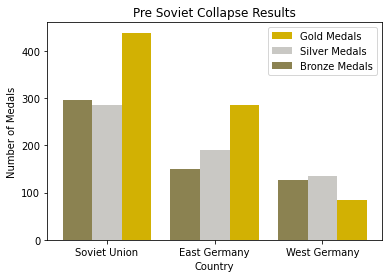

In [359]:
#plotting pre-collapse comparisons
width = 0.275
x_pre = np.array(range(len(pre_collapse_dfs)))

plt.bar(x_pre + width, golds_pre, width=width, color="#d2b103", label="Gold Medals")
plt.bar(x_pre, silvers_pre, width=width, color="#c9c8c4", label="Silver Medals")
plt.bar(x_pre - width, bronzes_pre, width=width, color="#8b8251", label="Bronze Medals")
plt.xticks(x_pre, countries_pre)
plt.title("Pre Soviet Collapse Results")
plt.ylabel("Number of Medals")
plt.xlabel("Country")
plt.legend()

plt.savefig("images/pre_collapse_comparison.png")
plt.show()

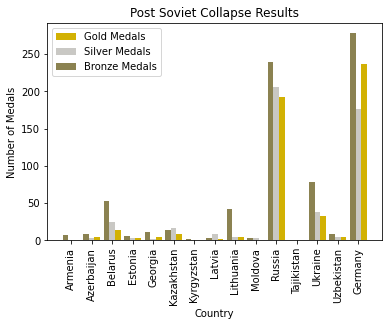

In [360]:
#plotting post-collapse comparisons
width = 0.275
x_post = np.array(range(len(post_collapse_dfs)))

plt.bar(x_post + width, golds_post, width=width, color="#d2b103", label="Gold Medals")
plt.bar(x_post, silvers_post, width=width, color="#c9c8c4", label="Silver Medals")
plt.bar(x_post - width, bronzes_post, width=width, color="#8b8251", label="Bronze Medals")
plt.xticks(x_post, countries_post, rotation=90)
plt.title("Post Soviet Collapse Results")
plt.ylabel("Number of Medals")
plt.xlabel("Country")
plt.legend()

plt.savefig("images/post_collapse_comparison.png")
plt.show()

Below, we're comparing the overall points values of the medals for the Soviet Union and former Soviet countries, then comparing the total medal values for East and West Germany to unified Germany.

In [361]:
#finding the total value of the points for each country
#setting lists to hold medal points totals
pre_collapse_points = []
post_collapse_points = []

#running through pre collapse countries to pull points
for df in pre_collapse_dfs:
    points = df["Points"].sum()
    pre_collapse_points.append(points)
    
#running through post collapse countries to pull points
for df in post_collapse_dfs:
    points = df["Points"].sum()
    post_collapse_points.append(points)

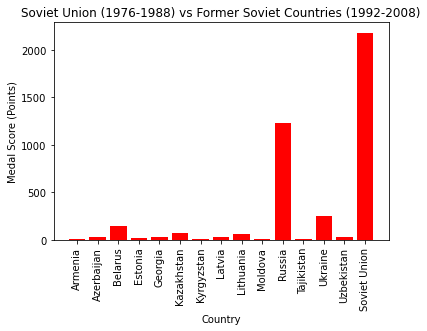

In [362]:
#comparing Soviet countries to the USSR
soviet_countries_points = post_collapse_points[:-1]
soviet_countries_points.append(pre_collapse_points[0])

#some plot data pulled from previous plots
plt.bar(x_sov, soviet_countries_points, color="r")
plt.xticks(x_sov, soviet_countries, rotation=90)
plt.title("Soviet Union (1976-1988) vs Former Soviet Countries (1992-2008)")
plt.ylabel("Medal Score (Points)")
plt.xlabel("Country")

plt.savefig("images/soviet_separate_comparison_by_points.png")
plt.show()

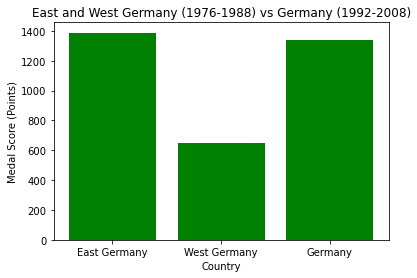

In [363]:
#comparing Germany to East and West Germany
germ_countries_points = pre_collapse_points[1:]
germ_countries_points.append(post_collapse_points[-1])

#plotting
plt.bar(x_germ, germ_countries_points, color="g")
plt.xticks(x_germ, german_comparison["Countries"])
plt.title("East and West Germany (1976-1988) vs Germany (1992-2008)")
plt.ylabel("Medal Score (Points)")
plt.xlabel("Country")

plt.savefig("images/german_separate_comparison_by_points.png")
plt.show()

From the combined data plots, we see that in total, all of the countries from the fromer Soviet union have collectively done about the same as the Soviet Union on its own. Individually, Russia's performance is the closest to the Soviet Union's, but it still falls short of the Soviet Union's performance.

For Germany, East and West Germany's combined performance was better than Germany on its own, but individually only East Germany's performance was comperable to Germany's.

# Top Performers the Year the Event is Introduced

This section looks at every sport the year it was introduced and returns the country that won the gold for that event.

In [364]:
#group the data by event
events_data = olympics_data.groupby("Event")
#get the first year for each event and save it to a list
first_years = events_data["Year"].first()
#dictionary of first year, sport, gender, and country
first_golds = {}

#running through the dataframe and the first years to get the remaining data
for index, row in olympics_data.iterrows():
    for name, value in first_years.items():
        if row["Event"] == name and row["Year"] == value and row["Medal"] == "Gold":
            first_golds[name] = [row["Year"], row["Gender"], row["Country"]]


In [365]:
#creating a summary dataframe
first_gold_countries = pd.DataFrame.from_dict(first_golds, orient="index", columns=["Year", "Gender", "Country"])
first_gold_countries

,Year,Gender,Country
3m springboard,1976.0,Women,United States
10m platform,1976.0,Men,Italy
4x100m freestyle relay,1976.0,Women,United States
4x100m medley relay,1976.0,Women,East Germany
800m freestyle,1976.0,Women,East Germany
...,...,...,...
marathon 10km,2008.0,Men,Netherlands
Laser Radial - One Person Dinghy,2008.0,Women,United States
RS:X - Windsurfer,2008.0,Men,New Zealand
Finn - Heavyweight Dinghy,2008.0,Men,United Kingdom


Below, we see the number of first event golds taken by country. Countries that did not win any golds in the given time frame (1976-2008) were not included.

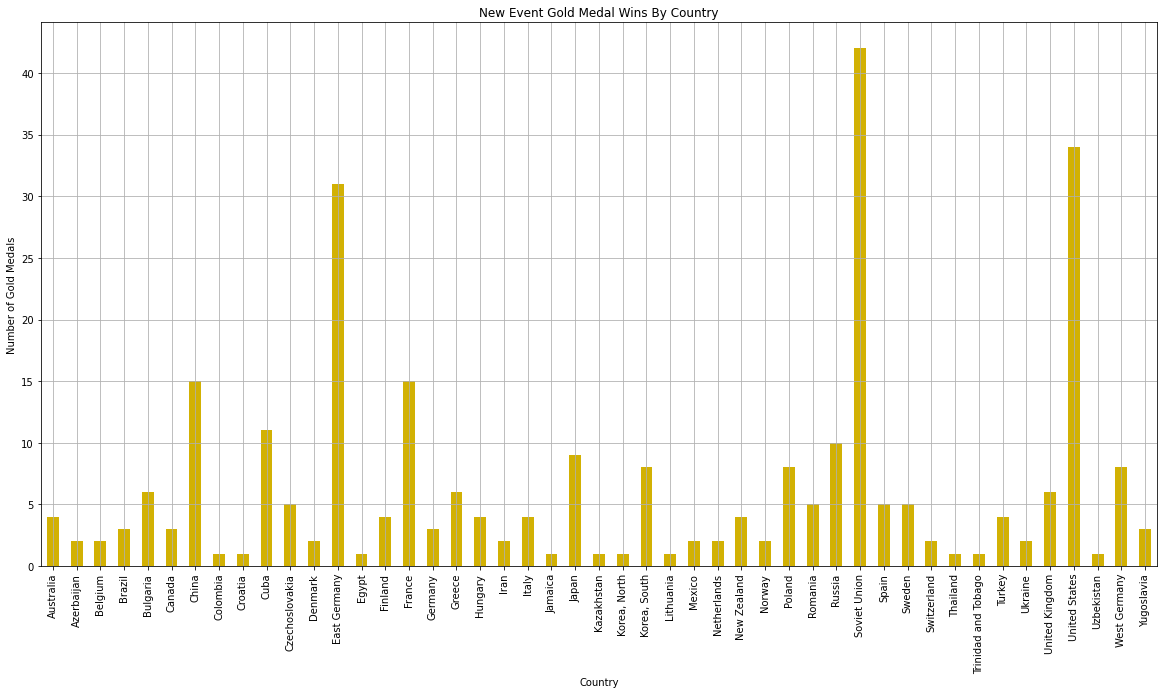

In [366]:
#group the first gold winners by country
country_wins = first_gold_countries.groupby("Country").count()["Year"]
#plot the results in a pie chart
country_wins.plot(kind="bar", x="country", y=counts, title="New Event Gold Medal Wins By Country", figsize=(20, 10), 
                  rot=90, ylabel="Number of Gold Medals", color="#d2b103", grid=True)

plt.savefig("images/new_event_golds_by_country.png")
plt.show()